# **Librerias**

In [ ]:
import pandas as pd
import os
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# **Funciones**

## Funciones Generales

In [ ]:
def get_data():
  data_train = pd.read_excel('/content/titanic_train (2).xlsx')
  data_train = drop_column(data_train)
  data_train = remove_na(data_train)
  data_train = label_sex(data_train)
  data_val = pd.read_excel('/content/titanic_val (2).xlsx')
  data_val = drop_column(data_val)
  data_val = remove_na(data_val)
  data_val = label_sex(data_val)
  return data_train, data_val

In [ ]:
def drop_column(data):
  data = data.drop(labels=['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Embarked'], axis = 1)
  return data

In [ ]:
def remove_na(data):
  data = data.dropna(subset=['Age'])
  return data

In [ ]:
def label_sex(data):
  data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
  return data

In [ ]:
def get_metrics(data_val, y_pred_raw):
  precision_list = []
  accuracy_list = []
  recall_list = []
  f1_list = []
  cut_list = []

  for cut in [x/1000 for x in range(1001)]:
    y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
    cut_list.append(cut)
    accuracy_list.append(accuracy_score(data_val,y_pred))
    precision_list.append(precision_score(data_val,y_pred))
    recall_list.append(recall_score(data_val,y_pred))
    f1_list.append(f1_score(data_val,y_pred))

  results = pd.DataFrame({'Cut':cut_list,
                          'Accuracy':accuracy_list,
                          'Recall':recall_list,
                          'Precision':precision_list,
                          'F1':f1_list})
  return results

In [ ]:
def graph(columns, model):
  features = columns
  importances = model.feature_importances_
  df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
  plt.title('Feature Importances')
  plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
  plt.yticks(range(len(df_importance)), df_importance['Feature'])
  plt.xlabel('Relative Importance')
  plt.show()
  table_of_graph(importances, df_importance)

In [ ]:
def table_of_graph(importances, df_importance):
  print("\n",df_importance.round(5))

## Funciones RF

In [ ]:
def random_forest_1(data_train, data_val):
  model = RandomForestClassifier().fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def random_forest_2(data_train, data_val):
  model = RandomForestClassifier(n_estimators=200, criterion = 'entropy', max_depth = 5).fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def random_forest_3(data_train, data_val):
  model = RandomForestClassifier(n_estimators=150, criterion = 'entropy', max_depth = 5, max_features = 'sqrt', class_weight='balanced').fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

## Funciones Gradient Boosting

In [ ]:
def gradient_boosting_1(data_train, data_val):
  model = GradientBoostingClassifier().fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def gradient_boosting_2(data_train, data_val):
  model = GradientBoostingClassifier(loss='exponential', learning_rate=0.01, n_estimators=150, criterion='mse').fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def gradient_boosting_3(data_train, data_val):
  model = GradientBoostingClassifier(loss='exponential', learning_rate=0.001, n_estimators=200, criterion='mae', max_depth=5, max_features='log2').fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

## Funciones XGBoost

In [ ]:
def XGB_1(data_train, data_val):
  model = xgb.XGBClassifier().fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def XGB_2(data_train, data_val):
  model = xgb.XGBClassifier(n_estimators=150, learning_rate=0.01).fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def XGB_3(data_train, data_val):
  model = xgb.XGBClassifier(n_estimators=250, learning_rate=0.0001, max_depth=5, objective='reg:logistic').fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

## Funciones SVM

In [ ]:
def SVM_1(data_train, data_val):
  model = SVC(probability=True).fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def SVM_2(data_train, data_val):
  model = SVC(probability=True, gamma='auto', tol=0.01).fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

In [ ]:
def SVM_3(data_train, data_val):
  model = SVC(probability=True, C=2, gamma='auto', tol=0.000000001, degree=6).fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'])
  return model.predict_proba(data_val.drop(labels=['Survived'], axis = 1)), model

# **Data** **Reading**

In [ ]:
data_train, data_val = get_data()
print(data_train.head(10))
print("\n", data_val.head(10))
print("\n", data_val['Survived'].head(10))

    Survived  Pclass  Sex   Age      Fare
0          0       2    1  28.0   33.0000
2          1       3    1   6.0   12.4750
5          1       2    0  35.0   21.0000
6          1       1    0  24.0   49.5042
8          0       2    1  30.0   10.5000
9          1       1    0  21.0  262.3750
10         1       3    0  27.0   12.4750
11         0       2    1  32.5   30.0708
12         0       3    0  41.0   39.6875
13         0       1    1  39.0    0.0000

     Survived  Pclass  Sex   Age      Fare
0          1       1    0  38.0   71.2833
1          1       1    0  35.0   53.1000
2          0       3    1  20.0    8.0500
3          0       1    1  19.0  263.0000
9          1       1    0  49.0   76.7292
10         0       3    1  22.0    7.2292
11         1       2    0  29.0   10.5000
12         0       2    1  21.0   73.5000
14         1       3    0  33.0   15.8500
16         0       1    1  46.0   61.1750

 0     1
1     1
2     0
3     0
9     1
10    0
11    1
12    0
14    1


In [ ]:
columns = data_train.drop(labels=['Survived'], axis = 1).columns
columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [ ]:
warnings.filterwarnings('ignore')

# **Random Forest**

In [ ]:
#No Hiperparametro - Default
y_pred_raw, modelRF_1 = random_forest_1(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
321  0.321  0.802817  0.822581       0.75  0.784615
322  0.322  0.802817  0.822581       0.75  0.784615
323  0.323  0.802817  0.822581       0.75  0.784615
324  0.324  0.802817  0.822581       0.75  0.784615
325  0.325  0.802817  0.822581       0.75  0.784615
326  0.326  0.802817  0.822581       0.75  0.784615
327  0.327  0.802817  0.822581       0.75  0.784615
328  0.328  0.802817  0.822581       0.75  0.784615
329  0.329  0.802817  0.822581       0.75  0.784615
330  0.330  0.802817  0.822581       0.75  0.784615


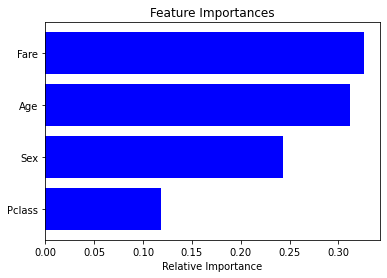


   Feature  Importance
0  Pclass     0.11828
1     Sex     0.24357
2     Age     0.31194
3    Fare     0.32620


In [ ]:
graph(columns, modelRF_1)

In [ ]:
#Hiperparametros - n_estimators=200, criterion = 'entropy', max_depth = 5
y_pred_raw, modelRF_2 = random_forest_2(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
267  0.267  0.823944  0.887097   0.753425  0.814815
268  0.268  0.823944  0.887097   0.753425  0.814815
269  0.269  0.823944  0.887097   0.753425  0.814815
270  0.270  0.823944  0.887097   0.753425  0.814815
271  0.271  0.823944  0.887097   0.753425  0.814815
272  0.272  0.823944  0.887097   0.753425  0.814815
273  0.273  0.823944  0.887097   0.753425  0.814815
274  0.274  0.823944  0.887097   0.753425  0.814815
409  0.409  0.845070  0.758065   0.870370  0.810345
410  0.410  0.845070  0.758065   0.870370  0.810345


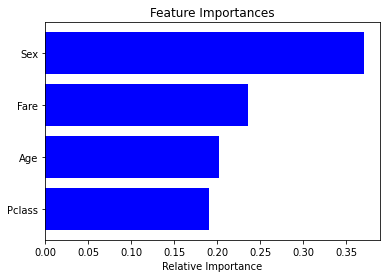


   Feature  Importance
0  Pclass     0.19113
2     Age     0.20211
3    Fare     0.23582
1     Sex     0.37094


In [ ]:
graph(columns, modelRF_2)

In [ ]:
#Hiperparametros - n_estimators=150, criterion = 'entropy', max_depth = 5, max_features = 'sqrt', class_weight='balanced'
y_pred_raw, modelRF_3 = random_forest_3(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy   Recall  Precision        F1
423  0.423   0.84507  0.83871     0.8125  0.825397
424  0.424   0.84507  0.83871     0.8125  0.825397
425  0.425   0.84507  0.83871     0.8125  0.825397
426  0.426   0.84507  0.83871     0.8125  0.825397
427  0.427   0.84507  0.83871     0.8125  0.825397
428  0.428   0.84507  0.83871     0.8125  0.825397
429  0.429   0.84507  0.83871     0.8125  0.825397
430  0.430   0.84507  0.83871     0.8125  0.825397
431  0.431   0.84507  0.83871     0.8125  0.825397
432  0.432   0.84507  0.83871     0.8125  0.825397


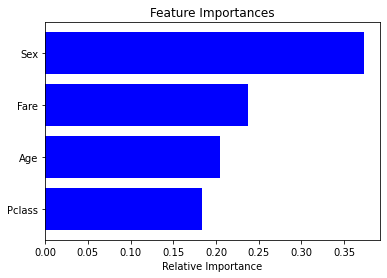


   Feature  Importance
0  Pclass     0.18389
2     Age     0.20484
3    Fare     0.23776
1     Sex     0.37350


In [ ]:
graph(columns, modelRF_3)

## **Gradient Boosting**

In [ ]:
#No Hiperparametro - Default
y_pred_raw, modelGB_1 = gradient_boosting_1(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
233  0.233  0.838028  0.854839   0.791045  0.821705
234  0.234  0.838028  0.854839   0.791045  0.821705
235  0.235  0.838028  0.854839   0.791045  0.821705
236  0.236  0.838028  0.854839   0.791045  0.821705
237  0.237  0.838028  0.854839   0.791045  0.821705
238  0.238  0.838028  0.854839   0.791045  0.821705
239  0.239  0.838028  0.854839   0.791045  0.821705
240  0.240  0.838028  0.854839   0.791045  0.821705
241  0.241  0.838028  0.854839   0.791045  0.821705
242  0.242  0.838028  0.854839   0.791045  0.821705


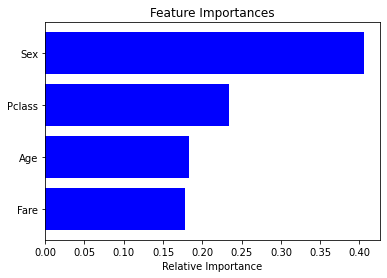


   Feature  Importance
3    Fare     0.17733
2     Age     0.18336
0  Pclass     0.23345
1     Sex     0.40586


In [ ]:
graph(columns, modelGB_1)

In [ ]:
#Hiperparametro - loss='exponential', learning_rate=0.01, n_estimators=150, criterion='mse'
y_pred_raw, modelGB_2 = gradient_boosting_2(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
386  0.386  0.838028  0.709677   0.897959  0.792793
387  0.387  0.838028  0.709677   0.897959  0.792793
388  0.388  0.838028  0.709677   0.897959  0.792793
389  0.389  0.838028  0.709677   0.897959  0.792793
390  0.390  0.838028  0.709677   0.897959  0.792793
391  0.391  0.838028  0.709677   0.897959  0.792793
392  0.392  0.838028  0.709677   0.897959  0.792793
393  0.393  0.838028  0.709677   0.897959  0.792793
394  0.394  0.838028  0.709677   0.897959  0.792793
395  0.395  0.838028  0.709677   0.897959  0.792793


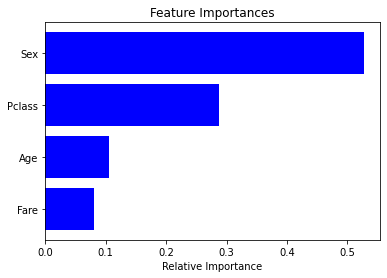


   Feature  Importance
3    Fare     0.08069
2     Age     0.10485
0  Pclass     0.28704
1     Sex     0.52742


In [ ]:
graph(columns, modelGB_2)

In [ ]:
#Hiperparametro - loss='exponential', learning_rate=0.001, n_estimators=200, criterion='mae', max_depth=5, max_features='log2'
y_pred_raw, modelGB_3 = gradient_boosting_3(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
384  0.384  0.838028  0.854839   0.791045  0.821705
385  0.385  0.838028  0.854839   0.791045  0.821705
386  0.386  0.838028  0.854839   0.791045  0.821705
388  0.388  0.838028  0.822581   0.809524  0.816000
387  0.387  0.830986  0.822581   0.796875  0.809524
394  0.394  0.852113  0.709677   0.936170  0.807339
389  0.389  0.830986  0.790323   0.816667  0.803279
376  0.376  0.816901  0.854839   0.757143  0.803030
377  0.377  0.816901  0.854839   0.757143  0.803030
378  0.378  0.816901  0.854839   0.757143  0.803030


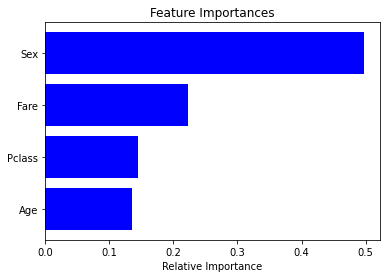


   Feature  Importance
2     Age     0.13480
0  Pclass     0.14431
3    Fare     0.22344
1     Sex     0.49745


In [ ]:
graph(columns, modelGB_3)

# **XGBoost**

In [ ]:
#No Hiperparametro - Default
y_pred_raw, modelXGB_1 = XGB_1(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
413  0.413   0.84507  0.774194   0.857143  0.813559
414  0.414   0.84507  0.774194   0.857143  0.813559
415  0.415   0.84507  0.774194   0.857143  0.813559
416  0.416   0.84507  0.774194   0.857143  0.813559
417  0.417   0.84507  0.774194   0.857143  0.813559
418  0.418   0.84507  0.774194   0.857143  0.813559
419  0.419   0.84507  0.774194   0.857143  0.813559
420  0.420   0.84507  0.774194   0.857143  0.813559
421  0.421   0.84507  0.774194   0.857143  0.813559
422  0.422   0.84507  0.774194   0.857143  0.813559


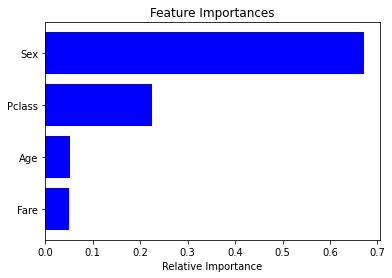


   Feature  Importance
3    Fare     0.05020
2     Age     0.05292
0  Pclass     0.22507
1     Sex     0.67181


In [ ]:
graph(columns, modelXGB_1)

In [ ]:
#Hiperparametro - booster='gblinear', n_estimators=150, learning_rate=0.01
y_pred_raw, modelXGB_2 = XGB_2(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy   Recall  Precision        F1
372  0.372  0.802817  0.83871   0.742857  0.787879
373  0.373  0.802817  0.83871   0.742857  0.787879
374  0.374  0.802817  0.83871   0.742857  0.787879
375  0.375  0.802817  0.83871   0.742857  0.787879
376  0.376  0.802817  0.83871   0.742857  0.787879
377  0.377  0.802817  0.83871   0.742857  0.787879
378  0.378  0.802817  0.83871   0.742857  0.787879
379  0.379  0.802817  0.83871   0.742857  0.787879
380  0.380  0.802817  0.83871   0.742857  0.787879
381  0.381  0.802817  0.83871   0.742857  0.787879


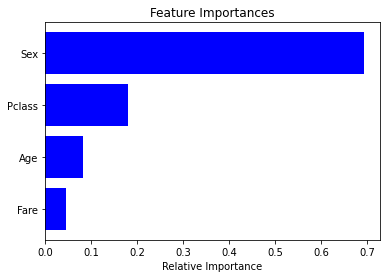


   Feature  Importance
3    Fare     0.04471
2     Age     0.08193
0  Pclass     0.18009
1     Sex     0.69326


In [ ]:
graph(columns, modelXGB_2)

In [ ]:
#Hiperparametro - n_estimators=250, learning_rate=0.0001, max_depth=5, objective='reg:logistic'
y_pred_raw, modelXGB_3 = XGB_2(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy   Recall  Precision        F1
372  0.372  0.802817  0.83871   0.742857  0.787879
373  0.373  0.802817  0.83871   0.742857  0.787879
374  0.374  0.802817  0.83871   0.742857  0.787879
375  0.375  0.802817  0.83871   0.742857  0.787879
376  0.376  0.802817  0.83871   0.742857  0.787879
377  0.377  0.802817  0.83871   0.742857  0.787879
378  0.378  0.802817  0.83871   0.742857  0.787879
379  0.379  0.802817  0.83871   0.742857  0.787879
380  0.380  0.802817  0.83871   0.742857  0.787879
381  0.381  0.802817  0.83871   0.742857  0.787879


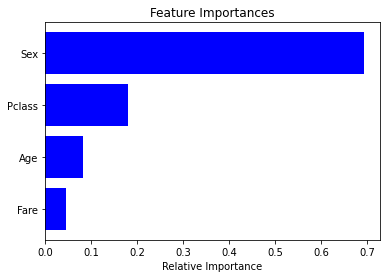


   Feature  Importance
3    Fare     0.04471
2     Age     0.08193
0  Pclass     0.18009
1     Sex     0.69326


In [ ]:
graph(columns, modelXGB_3)

# **SVM**

In [ ]:
#Hiperparametro - probability=True
y_pred_raw, modelSVM_1 = SVM_1(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
300  0.300  0.577465  0.919355   0.508929  0.655172
301  0.301  0.577465  0.903226   0.509091  0.651163
302  0.302  0.577465  0.887097   0.509259  0.647059
303  0.303  0.591549  0.854839   0.519608  0.646341
297  0.297  0.542254  0.951613   0.487603  0.644809
299  0.299  0.549296  0.935484   0.491525  0.644444
298  0.298  0.542254  0.935484   0.487395  0.640884
318  0.318  0.690141  0.629032   0.650000  0.639344
296  0.296  0.521127  0.967742   0.476190  0.638298
314  0.314  0.669014  0.645161   0.615385  0.629921


In [ ]:
#Hiperparametro - probability=True,  gamma='auto', tol=0.01
y_pred_raw, modelSVM_2 = SVM_2(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
311  0.311  0.669014  0.774194   0.592593  0.671329
261  0.261  0.626761  0.870968   0.545455  0.670807
262  0.262  0.626761  0.870968   0.545455  0.670807
214  0.214  0.605634  0.919355   0.527778  0.670588
215  0.215  0.605634  0.919355   0.527778  0.670588
216  0.216  0.605634  0.919355   0.527778  0.670588
213  0.213  0.598592  0.919355   0.522936  0.666667
308  0.308  0.661972  0.774194   0.585366  0.666667
309  0.309  0.661972  0.774194   0.585366  0.666667
310  0.310  0.661972  0.774194   0.585366  0.666667


In [ ]:
#Hiperparametro - probability=True, C=2, gamma='auto', tol=0.000000001, degree=6
y_pred_raw, modelSVM_2 = SVM_2(data_train, data_val)
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
316  0.316  0.669014  0.774194   0.592593  0.671329
272  0.272  0.626761  0.870968   0.545455  0.670807
273  0.273  0.626761  0.870968   0.545455  0.670807
258  0.258  0.619718  0.887097   0.539216  0.670732
238  0.238  0.612676  0.903226   0.533333  0.670659
230  0.230  0.605634  0.919355   0.527778  0.670588
231  0.231  0.605634  0.919355   0.527778  0.670588
232  0.232  0.605634  0.919355   0.527778  0.670588
229  0.229  0.598592  0.919355   0.522936  0.666667
314  0.314  0.661972  0.774194   0.585366  0.666667


# **Redes Neuronales**

## Red Neuronal 1

In [ ]:
#Creacion del modelo 
modelRN_1 = keras.models.Sequential()
modelRN_1.add(keras.layers.Dense(128, activation = 'relu', input_dim = data_train.drop(labels=['Survived'], axis = 1).shape[1]))
modelRN_1.add(keras.layers.Dense(64, activation = 'relu'))
modelRN_1.add(keras.layers.Dense(32, activation = 'relu'))
modelRN_1.add(keras.layers.Dense(16, activation = 'relu'))
modelRN_1.add(keras.layers.Dense(8, activation = 'relu'))
modelRN_1.add(keras.layers.Dense(4, activation = 'relu'))
modelRN_1.add(keras.layers.Dense(2, activation = 'relu'))
modelRN_1.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
modelRN_1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_48 (Dense)             (None, 2)               

In [ ]:
modelRN_1.compile(loss = 'binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
r_1 = modelRN_1.fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'], batch_size = 32, epochs = 50, validation_split = 0.2)

Epoch 1/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5215 - accuracy: 0.7527 - val_loss: 0.5713 - val_accuracy: 0.7391
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5187 - accuracy: 0.7505 - val_loss: 0.5880 - val_accuracy: 0.7391
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7571 - val_loss: 0.5847 - val_accuracy: 0.7478
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7527 - val_loss: 0.6222 - val_accuracy: 0.7478
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.7352 - val_loss: 0.5840 - val_accuracy: 0.7478
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7484 - val_loss: 0.5799 - val_accuracy: 0.7304
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7309 - val_loss: 0.6875 - val_accuracy: 0.7130
Epoch 8/50
15/15 [==

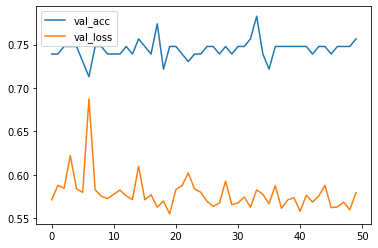

In [ ]:
plt.plot(r_1.history['val_accuracy'], label='val_acc')
plt.plot(r_1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
y_pred_raw = modelRN_1.predict(data_val.drop(labels=['Survived'], axis = 1))
y_pred_raw = [[1-x[0],x[0]] for x in y_pred_raw]
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
158  0.158   0.78169  0.887097   0.696203  0.780142
159  0.159   0.78169  0.887097   0.696203  0.780142
160  0.160   0.78169  0.887097   0.696203  0.780142
161  0.161   0.78169  0.887097   0.696203  0.780142
162  0.162   0.78169  0.887097   0.696203  0.780142
163  0.163   0.78169  0.887097   0.696203  0.780142
164  0.164   0.78169  0.887097   0.696203  0.780142
165  0.165   0.78169  0.887097   0.696203  0.780142
166  0.166   0.78169  0.887097   0.696203  0.780142
167  0.167   0.78169  0.887097   0.696203  0.780142


## Red Neuronal 2

In [ ]:
modelRN_2 = keras.models.Sequential()
modelRN_2.add(keras.layers.Dense(572, activation = 'relu', input_dim = data_train.drop(labels=['Survived'], axis = 1).shape[1]))
modelRN_2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
modelRN_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 572)               2860      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 573       
Total params: 3,433
Trainable params: 3,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelRN_2.compile(loss = 'poisson', optimizer='sgd', metrics=['accuracy'])
r_2 = modelRN_2.fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'], batch_size = 16, epochs = 100, validation_split = 0.1)

Epoch 1/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.8113 - val_loss: 0.6860 - val_accuracy: 0.8103
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.8093 - val_loss: 0.6487 - val_accuracy: 0.7931
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.8035 - val_loss: 0.6622 - val_accuracy: 0.8103
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7938 - val_loss: 0.6522 - val_accuracy: 0.7414
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.8016 - val_loss: 0.6760 - val_accuracy: 0.7931
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.7549 - val_loss: 0.6831 - val_accuracy: 0.8103
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.7879 - val_loss: 0.6556 - val_accuracy: 0.8276
Epoch 8/100
3

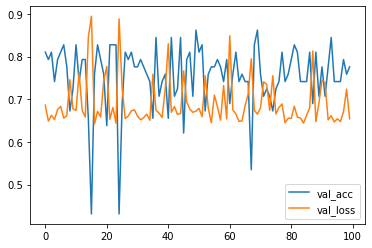

In [ ]:
plt.plot(r_2.history['val_accuracy'], label='val_acc')
plt.plot(r_2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
y_pred_raw = modelRN_2.predict(data_val.drop(labels=['Survived'], axis = 1))
y_pred_raw = [[1-x[0],x[0]] for x in y_pred_raw]
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy   Recall  Precision      F1
267  0.267  0.830986  0.83871   0.787879  0.8125
268  0.268  0.830986  0.83871   0.787879  0.8125
269  0.269  0.830986  0.83871   0.787879  0.8125
270  0.270  0.830986  0.83871   0.787879  0.8125
271  0.271  0.830986  0.83871   0.787879  0.8125
272  0.272  0.830986  0.83871   0.787879  0.8125
273  0.273  0.830986  0.83871   0.787879  0.8125
274  0.274  0.830986  0.83871   0.787879  0.8125
275  0.275  0.830986  0.83871   0.787879  0.8125
276  0.276  0.830986  0.83871   0.787879  0.8125


## Red Neuronal 3

In [ ]:
modelRN_3 = keras.models.Sequential()
modelRN_3.add(keras.layers.Dense(97, activation = 'relu', input_dim = data_train.drop(labels=['Survived'], axis = 1).shape[1]))
modelRN_3.add(keras.layers.Dense(15, activation = 'relu'))
modelRN_3.add(keras.layers.Dense(32, activation = 'relu'))
modelRN_3.add(keras.layers.Dense(78, activation = 'relu'))
modelRN_3.add(keras.layers.Dense(173, activation = 'relu'))
modelRN_3.add(keras.layers.Dense(20, activation = 'relu'))
modelRN_3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
modelRN_3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 97)                485       
_________________________________________________________________
dense_69 (Dense)             (None, 15)                1470      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_71 (Dense)             (None, 78)                2574      
_________________________________________________________________
dense_72 (Dense)             (None, 173)               13667     
_________________________________________________________________
dense_73 (Dense)             (None, 20)                3480      
_________________________________________________________________
dense_74 (Dense)             (None, 1)               

In [ ]:
modelRN_3.compile(loss = 'hinge', optimizer='Adadelta', metrics=['accuracy'])
r_3 = modelRN_3.fit(data_train.drop(labels=['Survived'], axis = 1), data_train['Survived'], batch_size = 20, epochs = 75, validation_split = 0.11)

Epoch 1/75
26/26 [==============================] - 1s 9ms/step - loss: 1.0941 - accuracy: 0.5992 - val_loss: 1.1129 - val_accuracy: 0.6190
Epoch 2/75
26/26 [==============================] - 0s 2ms/step - loss: 1.0941 - accuracy: 0.5992 - val_loss: 1.1129 - val_accuracy: 0.6190
Epoch 3/75
26/26 [==============================] - 0s 2ms/step - loss: 1.0941 - accuracy: 0.5992 - val_loss: 1.1129 - val_accuracy: 0.6190
Epoch 4/75
26/26 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.5992 - val_loss: 1.1129 - val_accuracy: 0.6190
Epoch 5/75
26/26 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.5992 - val_loss: 1.1129 - val_accuracy: 0.6190
Epoch 6/75
26/26 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.5992 - val_loss: 1.1129 - val_accuracy: 0.6190
Epoch 7/75
26/26 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.5992 - val_loss: 1.1129 - val_accuracy: 0.6190
Epoch 8/75
26/26 [==

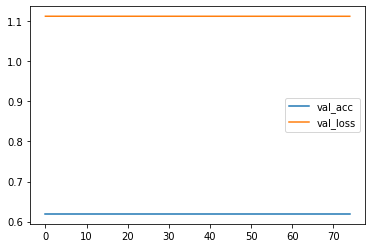

In [ ]:
plt.plot(r_3.history['val_accuracy'], label='val_acc')
plt.plot(r_3.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
y_pred_raw = modelRN_1.predict(data_val.drop(labels=['Survived'], axis = 1))
y_pred_raw = [[1-x[0],x[0]] for x in y_pred_raw]
results = get_metrics(data_val['Survived'], y_pred_raw)
print(results.sort_values(by=['F1', 'Accuracy'], ascending=False).head(10))

       Cut  Accuracy    Recall  Precision        F1
158  0.158   0.78169  0.887097   0.696203  0.780142
159  0.159   0.78169  0.887097   0.696203  0.780142
160  0.160   0.78169  0.887097   0.696203  0.780142
161  0.161   0.78169  0.887097   0.696203  0.780142
162  0.162   0.78169  0.887097   0.696203  0.780142
163  0.163   0.78169  0.887097   0.696203  0.780142
164  0.164   0.78169  0.887097   0.696203  0.780142
165  0.165   0.78169  0.887097   0.696203  0.780142
166  0.166   0.78169  0.887097   0.696203  0.780142
167  0.167   0.78169  0.887097   0.696203  0.780142


# **Conclusiones**

## Random Forest
En conclusión, para Random Forest se puede observar que en caso el caso 1 la importancia más grande recae en lo que viene siendo Fare mientras que en los siguientes dos casos Sex toma mayor prioridad, aunque sea Fare viene siguiendo en estos otros dos casos en segundo lugar. Ahora en términos de resultados se observo claras mejores en cuanto a Accuracy y F1 en el 2 y 3 caso a comparación con el caso 1 el defaulto pero el mejor con mejores datos tiende a ser el 3 caso pero este puede ser debatible ya que si se ve el caso dos uno también puede decir que es el mejor pero por sus otros factores.

## Gardient Boosting
En conclusión, para el Gardient Boosting en términos de importancia los tres casos se enfocan demasiado Sex para el modelo con segundo lugar Fare para el caso 1 y caso 3 ya que el caso 2 le da más importancia a Pclass. Ahora en términos de cual es el mejor esto se puede entrar en debate, pero el mas prominente es el caso 3 el cual conserva mejor estabilidad que los otros 2 casos, aunque si se busca tener una alta precisión el caso numero 2 da los mejores resultados.

## XGBoost
En conclusión, para el XGBoost en términos de Importancia esta es casi similar en los tres casos no en número, pero términos a que le da importancia este modelo el cual es a Sex el cual depende demasiado y le sigue Pclass. En términos del mejor caso este viene siendo el caso 1 el default y aunque este no tiene el mejor Recall aun tiene el mejor Accuracy, Precision y F1 de los otros 3 y aunque se el sacrificio del Recall no es muy grande.

## SVM
En conclusión, para el SVM el cual ha mostrado los resultados mas raros y aleatorios de los modelos a hacer donde, aunque se tiene un mejor caso no se recomienda usar este método para modelar ya que da resultados con muy poca Accuracy y F1 y así mismo Precisión aquí lo único que se logra con mayor éxito en los 3 es el Recall el cual el caso 1 muestra el mejor. En términos ya para finalizar esta conclusión seria entre caso 2 y caso 3 el mejor en SVM.

## Redes Neuronales
En conclusión, para el caso de Redes Neuronales el mejor caso fue con el caso numero 2 el cual consiguió los mejores resultados en los tres, pero. En otros términos, es decir en términos de loss esta viene siendo el caso 1 con .5 como aproximado siguiéndole el caso 2 con .6 y con el caso mas interesante con el caso 3 con un loss de 1.09 aproximadamente.
